### Problem 01 - Gas Turbine
Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

#### 1. Import Necessary Libraries

In [22]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Flatten,Conv2D,MaxPooling2D,Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator

#### 2. Importing the Data

In [24]:
data_1 = pd.read_csv('gas_turbines.csv')
data_1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


#### 3. Data Understanding

In [25]:
data_1.shape

(15039, 11)

In [26]:
data_1.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [27]:
data_1.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [28]:
data_1.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


#### 4. Data Preparation

In [29]:
X = data_1.drop(labels = ['TEY'], axis = 1)
y = data_1[['TEY']]

In [30]:
X.shape, y.shape

((15039, 10), (15039, 1))

In [31]:
mm_scale = MinMaxScaler()

In [32]:
mm_scale = mm_scale.fit_transform(X)

In [36]:
X_scaled = pd.DataFrame(data = mm_scale,columns=X.columns)
X_scaled

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578


In [37]:
X_scaled_corr = X_scaled.corr().round(1)

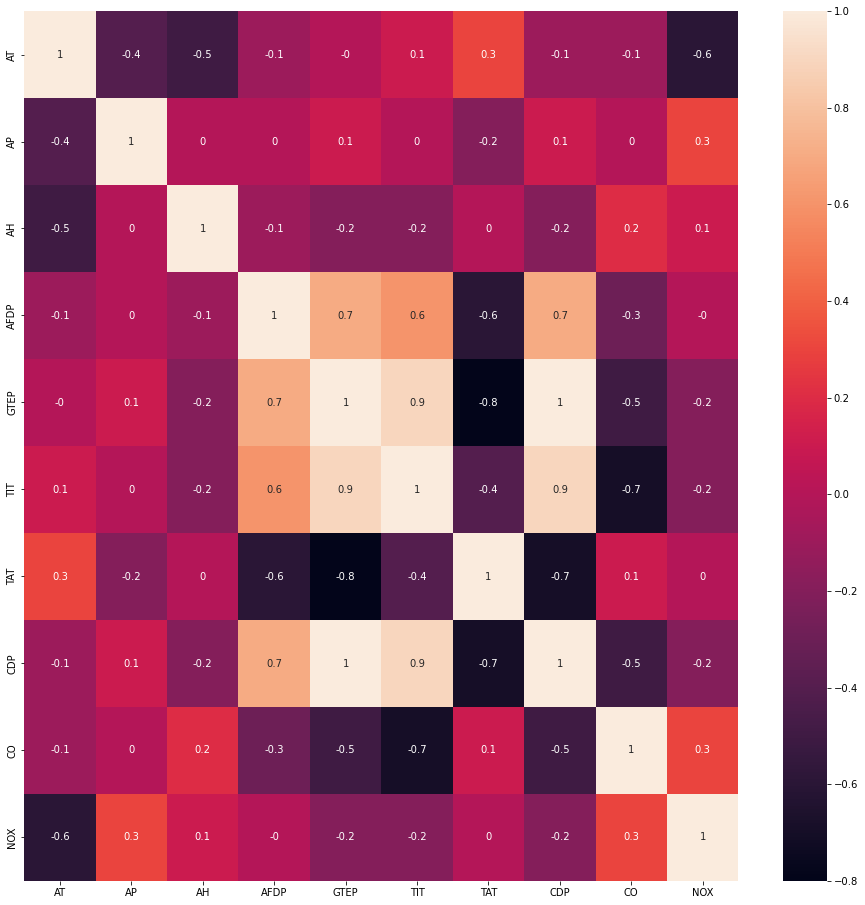

In [38]:
plt.figure(figsize=[16,16])
sns.heatmap(X_scaled_corr, annot= True)
plt.show()

In [40]:
pca_decomposition = PCA(n_components=10,random_state=12)
X_transformed     = pca_decomposition.fit_transform(X_scaled) #PCA expects data in common scale.
X_transformed_df  = pd.DataFrame(data = X_transformed)

X_transformed_df

,0,1,2,3,4,5,6,7,8,9
0,-0.507891,0.417932,-0.034207,0.018428,0.162776,-0.050036,-0.017900,-0.018899,0.001095,0.000904
1,-0.506370,0.423833,-0.033039,0.015392,0.154440,-0.046921,-0.015477,-0.017430,0.004955,0.000339
2,-0.501622,0.413721,-0.018318,0.015027,0.148164,-0.049796,-0.019057,-0.017425,0.006708,0.000927
3,-0.500464,0.406062,-0.009108,0.009130,0.143571,-0.048122,-0.017158,-0.017534,0.006892,0.000227
4,-0.499236,0.399044,-0.007083,0.009476,0.132722,-0.040627,-0.015116,-0.016896,0.005074,0.001277
...,...,...,...,...,...,...,...,...,...,...
15034,-0.542622,0.406649,-0.040907,0.185461,0.170543,-0.024086,-0.008881,-0.020046,-0.001360,0.004335
15035,-0.511467,0.460302,-0.011580,0.248330,0.168405,-0.035903,-0.007644,-0.024798,0.001057,0.004455
15036,-0.477436,0.555224,0.089911,0.374131,0.211895,-0.027661,0.104715,-0.011854,-0.007209,0.001435
15037,-0.498978,0.532139,0.068347,0.255225,0.217232,-0.035197,0.104506,-0.030844,-0.013263,-0.003991


In [41]:
pca_explained_ratio = pca_decomposition.explained_variance_ratio_
np.cumsum(np.round(a = pca_explained_ratio,decimals=4)*100)

array([ 50.32,  76.29,  84.97,  91.32,  95.54,  98.15,  99.63,  99.95,
        99.99, 100.  ])

In [42]:
pca_decomposition.explained_variance_

array([1.51136491e-01, 7.80045349e-02, 2.60653125e-02, 1.90810858e-02,
       1.26685494e-02, 7.83243126e-03, 4.44904587e-03, 9.59969439e-04,
       1.28040961e-04, 4.22926371e-05])

Text(0.5, 1.0, 'Scree Plot')

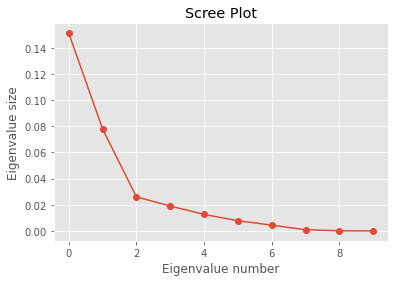

In [43]:
plt.style.use("ggplot") 
plt.plot(pca_decomposition.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [44]:
pca_decomposition = PCA(n_components=2,random_state=12)
X_transformed     = pca_decomposition.fit_transform(X_scaled) #PCA expects data in common scale.
X_transformed_df  = pd.DataFrame(data = X_transformed)
X_transformed_df.columns = ['X1','X2']
X_transformed_df

,X1,X2
0,-0.507891,0.417932
1,-0.506370,0.423833
2,-0.501622,0.413721
3,-0.500464,0.406062
4,-0.499236,0.399044
...,...,...
15034,-0.542622,0.406649
15035,-0.511467,0.460302
15036,-0.477436,0.555224
15037,-0.498978,0.532139


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=12, shuffle=True)

In [47]:
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((12031, 2), (3008, 2), (12031, 1), (3008, 1))

#### 5. Model Building
5.1 Building the architecture

In [79]:
model = Sequential()

In [80]:
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                192       
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=[tf.keras.metrics.RootMeanSquaredError()])

#### 6. Model Training

In [82]:
model.fit(x=X_train,y=y_train,batch_size=9,epochs=40)

Epoch 1/40
1337/1337 [==============================] - 6s 2ms/step - loss: 2494.2598 - root_mean_squared_error: 49.9426
Epoch 2/40
1337/1337 [==============================] - 2s 2ms/step - loss: 7.8453 - root_mean_squared_error: 2.8009
Epoch 3/40
1337/1337 [==============================] - 2s 2ms/step - loss: 4.8068 - root_mean_squared_error: 2.1924
Epoch 4/40
1337/1337 [==============================] - 2s 2ms/step - loss: 4.5855 - root_mean_squared_error: 2.1414
Epoch 5/40
1337/1337 [==============================] - 2s 2ms/step - loss: 4.2631 - root_mean_squared_error: 2.0647
Epoch 6/40
1337/1337 [==============================] - 2s 2ms/step - loss: 4.1104 - root_mean_squared_error: 2.0274
Epoch 7/40
1337/1337 [==============================] - 2s 2ms/step - loss: 3.9681 - root_mean_squared_error: 1.9920
Epoch 8/40
1337/1337 [==============================] - 2s 2ms/step - loss: 3.8917 - root_mean_squared_error: 1.9727
Epoch 9/40
1337/1337 [==============================] - 2s 2

#### 7. Model Testing and Evaluation

In [83]:
model.evaluate(X_train, y_train)

376/376 [==============================] - 1s 2ms/step - loss: 3.1608 - root_mean_squared_error: 1.7779


[3.1608176231384277, 1.7778688669204712]

In [84]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 3.0785 - root_mean_squared_error: 1.7546


[3.0785112380981445, 1.7545686960220337]

#### 8. Conclusion